# Traiter la donnée -- Dataframes


Pour le réaliser sans installation, depuis un navigateur :
<a href="https://colab.research.google.com/github/eddes/INSA/blob/main/python/tuto_dataframe.ipynb"> ça se passe ici<a>


Dans de nombreux des domaines, la donnée disponible est fournie dans des fichiers texte, où les valeurs des différentes grandeurs sont séparées par des virgules (vos tableurs favoris exportent parfois en `.csv` - acronyme de _comma separated values_).
    
Une librairie particulièrement bien adaptée au traitement de tels fichiers est `pandas`. Dans ce qui suit, nous allons eb apprendre les bases.
    
## Ouverture et affichage de base

Ouvrons un des fichiers de données météorologiques mesurées près de la ville de Strasbourg en 2023.

In [4]:
import pandas as pd
chemin='./src/meteo_Strasbourg_2023.csv'
donnee = pd.read_csv(chemin)

Pour afficher quelques stats de base sur les données :

In [5]:
donnee.describe()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
count,1848.000000,1848.000000,1848.000000,1848.000000,608.0,1848.000000,1848.000000,1848.000000,1848.000000,0.0,1848.000000
mean,19.921916,10.926840,59.792208,0.052489,0.0,170.846861,11.822294,21.776136,1016.550866,NaN,4.145563
std,5.818102,3.669961,19.372118,0.420076,0.0,129.132250,6.827365,9.394996,3.602004,NaN,2.867574
min,4.500000,2.100000,21.000000,0.000000,0.0,0.000000,0.000000,3.700000,1007.700000,NaN,1.000000
25%,15.575000,8.500000,44.000000,0.000000,0.0,30.000000,6.000000,14.800000,1014.000000,NaN,4.000000
50%,19.200000,10.500000,60.000000,0.000000,0.0,180.000000,11.000000,20.400000,1016.300000,NaN,4.000000
75%,24.500000,13.600000,75.000000,0.000000,0.0,300.000000,16.600000,27.800000,1018.700000,NaN,4.000000
max,36.000000,21.000000,100.000000,9.000000,0.0,360.000000,35.300000,57.000000,1026.100000,NaN,25.000000


On peut donc, pour chaque colonne, lire les min/max ainsi que les percentiles de la série.

Ensuite, il est pratique de connaître le nom des données stockées, pour pouvoir les appeler séparément :

In [6]:
donnee.keys()

Index(['time', 'temp', 'dwpt', 'rhum', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun', 'coco'],
      dtype='object')

On constate que le temps `time` et la température `temp` sont stockées. On va pouvoir y faire appel simplement par leur nom avec une commande du style :

In [7]:
donnee['temp']

0       10.3
1        9.8
2        9.8
3        9.8
4       10.0
        ... 
1843    21.0
1844    20.0
1845    19.6
1846    18.0
1847    17.0
Name: temp, Length: 1848, dtype: float64

On notera la présence d'un index (colonne de gauche qui est affichée). Cet index est commun à toutes les données stockées, lorsqu'il y en a plusieurs. Il peut aussi être un temps (heure/min/sec j/m/a) ce qui se révèlera particulièrement pratique par la suite.

Si on souhaite uniquement en prendre les valeurs on utilise le suffixe `values` :

In [8]:
T = donnee['temp'].values
print(T)

[10.3  9.8  9.8 ... 19.6 18.  17. ]


## Sélection de données avec pandas

Il est parfois pratique de connaître/isoler rapidement les valeurs en-dessous ou au-dessus d'un certain seuil. Supposons qu'on veuille connaitre les instants où la température est supérieure à 26°C :

In [9]:
fait_chaud = donnee[ donnee['temp'] > 26]
print(fait_chaud)

                     time  temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt  \
495   2023-05-21 15:00:00  26.5  14.3  47.0   0.0   0.0   20.0  16.6  41.0   
496   2023-05-21 16:00:00  26.4  13.9  46.0   0.0   NaN   20.0  18.4  25.9   
515   2023-05-22 11:00:00  26.3  15.4  51.0   0.0   NaN   40.0   9.4  20.4   
516   2023-05-22 12:00:00  27.2  15.2  48.0   0.0   0.0  120.0   3.6  24.0   
517   2023-05-22 13:00:00  26.8  15.5  50.0   0.0   NaN  280.0  13.0  24.1   
...                   ...   ...   ...   ...   ...   ...    ...   ...   ...   
1814  2023-07-15 14:00:00  30.0  17.1  46.0   0.0   NaN  170.0  15.0  29.6   
1815  2023-07-15 15:00:00  30.6  19.9  53.0   0.0   0.0   20.0  15.0  31.0   
1816  2023-07-15 16:00:00  29.0  19.0  55.0   0.0   NaN  360.0  19.0  40.8   
1817  2023-07-15 17:00:00  29.0  19.0  55.0   0.0   NaN   10.0  20.0  33.3   
1818  2023-07-15 18:00:00  26.3  18.4  62.0   0.0   0.0  350.0  26.0  37.0   

        pres  tsun  coco  
495   1010.7   NaN   3.0  
496   101

Il y a donc 309 valeurs avec une température supérieure à 26.

Pour pouvoir identifier s'il s'agit du jour ou de la nuit, on peut utiliser la colonne `time` en s'assurant de convertir l'horodatage au format qui correspond :

In [13]:
donnee[donnee['time'].hour > 20]

AttributeError: 'Series' object has no attribute 'hour'

###  Fusion de deux dataframe en conservant l'index, les valeurs et en interpolant sur les NaN

Oui, c'est possible et c'est même très pratique : par exemple quand on récupère des données mesurées et qu'on souhaite y adjoindre une mesure sur un autre pas de temps. Un exemple typique est le cas de mesures dans un bâtiment et de la température extérieure, récupérée par exemple avec <a href="https://colab.research.google.com/github/eddes/INSA/blob/main/python/tuto_meteostat.ipynb"> Meteostat<a>.
    
L'exemple qui suit traite de ce cas pratique, avec un fichier **meteo.csv** qui contient des mesures à heures fixes et un fixer **mesure.csv** qui contient des mesures toutes les 15 minutes, sans être calé sur une heure "pile" (ouvrir le fichier pour mieux saisir).

quoi dedans ?  Index(['temp', 'dwpt', 'rhum', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres',
       'tsun', 'coco'],
      dtype='object')


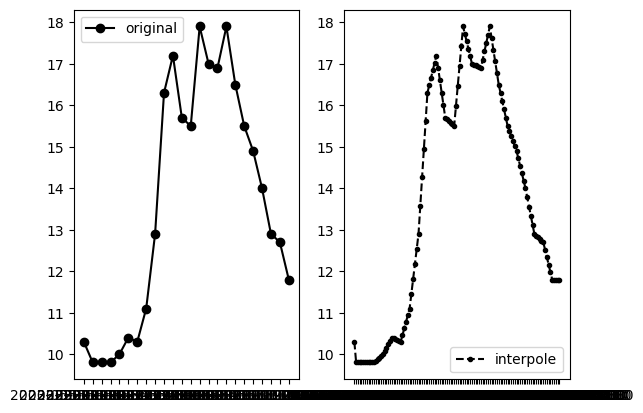

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
# lecture du fichier meteo
df_meteo = pd.read_csv('./src/meteo.csv', index_col=0, header="infer",delimiter=',')
print('quoi dedans ? ', df_meteo.keys())

# on nettoie car seule la premiere colonne 'temp' nous interesse et on ne souhaite pas realiser l'interpolation sur toutes les colonnes
# 'temp' est la grandeur qui nous interesse, c'est la premiere colonne
# on cree donc une liste des colonnes qui vont etre supprimées
cols = range(1, len(df_meteo .keys() ))  
# c'est parti : noter la syntaxe df.drop()
df_meteo.drop(df_meteo .columns[cols], axis=1, inplace=True) 

# on lit les donnees mesurees
df_mesure = pd.read_csv('./src/mesure.csv', index_col=0, header="infer",delimiter=',')

# on va fusionner les deux et surtout les reclasser par index, sinon pas d'interpolation
df_concat = pd.concat([df_mesure,df_meteo]).sort_index()

# puis on interpole lineairement sur les donnees disponibles (il y a plusieurs methodes d'interpolation)
df_interp = df_concat.interpolate(method='linear')

plt.subplot(121)
plt.plot(df_meteo['temp'],'k-o', label='original')
plt.legend()
plt.subplot(122)
plt.plot(df_interp['temp'], 'k--.', label='interpole')
plt.legend()

# au besoin on sauve pour regarder ce qu'il y a dedans
# df_interp.to_csv('./data_interp.csv')
# df_concat.to_csv('./data_concat.csv')